You might be aware that CoDS-COMAD 2025, the prestigious international data science conference is 
happening by the end of the year. As a part of the conference, there is an associated data challenge to 
predict the key attributes from product images. Given an image of a dress item (in 5 categories: Men 
Tshirts,Sarees,Kurtis,Women Tshirts,Women Tops & Tunics), the task is to predict the attributes of 
the image such as color, sleeve_styling, transparency, fit_shape, pattern, length, etc.  Each category 
of the dress item may have a different number of dress attributes. To download the data, you may 
have to fill a form to get access to the competition page. 
We are going to use our knowledge from manifold learning and dimension reduction lectures to 
visualize the dataset and discover interesting patterns and their association with product attributes. 

In [33]:
import pandas as pd
train_data=pd.read_csv("/kaggle/input/visual-taxonomy/train.csv")

In [34]:
import pyarrow.parquet as pa
attributes=pa.read_table("/kaggle/input/visual-taxonomy/category_attributes.parquet")
attributes

pyarrow.Table
Category: string
No_of_attribute: int64
Attribute_list: list<item: string>
  child 0, item: string
----
Category: [["Men Tshirts","Sarees","Kurtis","Women Tshirts","Women Tops & Tunics"]]
No_of_attribute: [[5,10,9,8,10]]
Attribute_list: [[["color","neck","pattern","print_or_pattern_type","sleeve_length"],["blouse_pattern","border","border_width","color","occasion","ornamentation","pallu_details","pattern","print_or_pattern_type","transparency"],["color","fit_shape","length","occasion","ornamentation","pattern","print_or_pattern_type","sleeve_length","sleeve_styling"],["color","fit_shape","length","pattern","print_or_pattern_type","sleeve_length","sleeve_styling","surface_styling"],["color","fit_shape","length","neck_collar","ocassion","pattern","print_or_pattern_type","sleeve_length","sleeve_styling","surface_styling"]]]

In [35]:
train_data

id             Category  len      attr_1   attr_2   attr_3  \
0          0          Men Tshirts    5     default    round  printed   
1          1          Men Tshirts    5  multicolor     polo    solid   
2          2          Men Tshirts    5     default     polo    solid   
3          3          Men Tshirts    5  multicolor     polo    solid   
4          4          Men Tshirts    5  multicolor     polo    solid   
...      ...                  ...  ...         ...      ...      ...   
70208  70374  Women Tops & Tunics   10  multicolor   fitted  regular   
70209  70375  Women Tops & Tunics   10      yellow  regular     crop   
70210  70376  Women Tops & Tunics   10      maroon   fitted     crop   
70211  70377  Women Tops & Tunics   10         NaN      NaN      NaN   
70212  70378  Women Tops & Tunics   10        pink     boxy     crop   

            attr_4         attr_5   attr_6      attr_7         attr_8  \
0          default  short sleeves      NaN         NaN            NaN   
1            solid  short sleeves      NaN         NaN            NaN   
2            solid  short sleeves      NaN         NaN            NaN   
3            solid  short sleeves      NaN         NaN            NaN   
4            solid  short sleeves      NaN         NaN            NaN   
...            ...            ...      ...         ...            ...   
70208  square neck         casual  printed     default  short sleeves   
70209   round neck         casual  default     default  short sleeves   
70210   round neck         casual    solid       solid  short sleeves   
70211         high            NaN      NaN         NaN  short sleeves   
70212       v-neck         casual  printed  typography  short sleeves   

                attr_9  attr_10  
0                  NaN      NaN  
1                  NaN      NaN  
2                  NaN      NaN  
3                  NaN      NaN  
4                  NaN      NaN  
...                ...      ...  
70208  regular sleeves  ruffles  
70209  regular sleeves  knitted  
70210  regular sleeves  knitted  
70211              NaN      NaN  
70212  regular sleeves      NaN  

[70213 rows x 13 columns]

In [36]:
train_data['Category'].unique

<bound method Series.unique of 0                Men Tshirts
1                Men Tshirts
2                Men Tshirts
3                Men Tshirts
4                Men Tshirts
                ...         
70208    Women Tops & Tunics
70209    Women Tops & Tunics
70210    Women Tops & Tunics
70211    Women Tops & Tunics
70212    Women Tops & Tunics
Name: Category, Length: 70213, dtype: object>

# Task 1
The challenge dataset contains ~70k training image in 5 categories with the respective attributes. For 
each category, pick any two attributes of your choice (say color or length or pattern, or any) to form 
baskets. Each basket is a <category, attribute> tuple.  You will create two tuples per category, so in 
total you should have 10 baskets.  Draw 100 samples from each basket.  If your basket does not 
have 100 samples, reconfigure your basket by changing the attribute.

In [37]:
categories = ["Men Tshirts", "Sarees", "Kurtis", "Women Tshirts", "Women Tops & Tunics"]
no_of_attributes = [5, 10, 9, 8, 10]

attribute_list = [
    ["color", "neck", "pattern", "print_or_pattern_type", "sleeve_length"],
    ["blouse_pattern", "border", "border_width", "color", "occasion", "ornamentation", "pallu_details", "pattern", "print_or_pattern_type", "transparency"],
    ["color", "fit_shape", "length", "occasion", "ornamentation", "pattern", "print_or_pattern_type", "sleeve_length", "sleeve_styling"],
    ["color", "fit_shape", "length", "pattern", "print_or_pattern_type", "sleeve_length", "sleeve_styling", "surface_styling"],
    ["color", "fit_shape", "length", "neck_collar", "ocassion", "pattern", "print_or_pattern_type", "sleeve_length", "sleeve_styling", "surface_styling"]
]

mapped_attributes = []
for i, category in enumerate(categories):
    no_attrs = no_of_attributes[i]
    mapped_attrs = [f'attr_{j+1}' for j in range(no_attrs)]
    mapped_attributes.append(mapped_attrs)

baskets = []
for i, category in enumerate(categories):
    mapped_attrs = mapped_attributes[i]
    selected_attributes = random.sample(mapped_attrs, 2)
    for attribute in selected_attributes:
        baskets.append((category, attribute))

samples = {}
target_values = {}
target_counter = 0

for basket in baskets:
    category, attribute_column = basket
    basket_df = train_data[(train_data['Category'] == category) & train_data[attribute_column].notna()]
    if len(basket_df) < 100:
        basket_df = train_data[train_data['Category'] == category].sample(100, replace=True)
    else:
        basket_df = basket_df.sample(100)
    target_values[basket] = target_counter
    basket_df['target'] = target_counter
    target_counter += 1
    samples[basket] = basket_df

for basket, sample_df in samples.items():
    print("\n")
    print(f"Basket: {basket}, Target: {target_values[basket]}")
    print("\n")
    print(sample_df) 




Basket: ('Men Tshirts', 'attr_5'), Target: 0


        id     Category  len      attr_1 attr_2   attr_3      attr_4  \
7148  7272  Men Tshirts    5         NaN    NaN      NaN         NaN   
3192  3192  Men Tshirts    5       white  round  printed  typography   
1092  1092  Men Tshirts    5     default   polo    solid       solid   
3182  3182  Men Tshirts    5       black   polo    solid       solid   
4233  4233  Men Tshirts    5     default  round      NaN     default   
...    ...          ...  ...         ...    ...      ...         ...   
5162  5162  Men Tshirts    5     default   polo    solid       solid   
1754  1754  Men Tshirts    5  multicolor   polo    solid       solid   
3550  3550  Men Tshirts    5     default   polo    solid       solid   
522    522  Men Tshirts    5     default  round      NaN     default   
1048  1048  Men Tshirts    5     default  round  printed     default   

             attr_5 attr_6 attr_7 attr_8 attr_9 attr_10  target  
7148  short sleeves 

In [38]:
baskets

[('Men Tshirts', 'attr_5'),
 ('Men Tshirts', 'attr_3'),
 ('Sarees', 'attr_2'),
 ('Sarees', 'attr_7'),
 ('Kurtis', 'attr_4'),
 ('Kurtis', 'attr_3'),
 ('Women Tshirts', 'attr_7'),
 ('Women Tshirts', 'attr_1'),
 ('Women Tops & Tunics', 'attr_10'),
 ('Women Tops & Tunics', 'attr_5')]

In [39]:
import pandas as pd
import random

categories = ["Men Tshirts", "Sarees", "Kurtis", "Women Tshirts", "Women Tops & Tunics"]
no_of_attributes = [5, 10, 9, 8, 10]

attribute_list = [
    ["color", "neck", "pattern", "print_or_pattern_type", "sleeve_length"],
    ["blouse_pattern", "border", "border_width", "color", "occasion", "ornamentation", "pallu_details", "pattern", "print_or_pattern_type", "transparency"],
    ["color", "fit_shape", "length", "occasion", "ornamentation", "pattern", "print_or_pattern_type", "sleeve_length", "sleeve_styling"],
    ["color", "fit_shape", "length", "pattern", "print_or_pattern_type", "sleeve_length", "sleeve_styling", "surface_styling"],
    ["color", "fit_shape", "length", "neck_collar", "occasion", "pattern", "print_or_pattern_type", "sleeve_length", "sleeve_styling", "surface_styling"]
]

mapped_attributes = []
for i, category in enumerate(categories):
    no_attrs = no_of_attributes[i]
    mapped_attrs = [f'attr_{j+1}' for j in range(no_attrs)]
    mapped_attributes.append(mapped_attrs)

baskets = []
for i, category in enumerate(categories):
    mapped_attrs = mapped_attributes[i]
    selected_attributes = random.sample(mapped_attrs, 2)
    for attribute in selected_attributes:
        baskets.append((category, attribute))

samples = []
target_values = {}
target_counter = 0

for basket in baskets:
    category, attribute_column = basket
    basket_df = train_data[(train_data['Category'] == category) & train_data[attribute_column].notna()]
    
    if len(basket_df) < 100:
        basket_df = train_data[train_data['Category'] == category].sample(100, replace=True)
    else:
        basket_df = basket_df.sample(100)

    target_values[basket] = target_counter
    basket_df['target'] = target_counter
    target_counter += 1
    
    samples.append(basket_df)

final_df = pd.concat(samples, ignore_index=True)
final_df


id             Category  len   attr_1   attr_2   attr_3      attr_4  \
0     5641          Men Tshirts    5      NaN    round    solid         NaN   
1     6257          Men Tshirts    5      NaN    round      NaN         NaN   
2     2795          Men Tshirts    5    white    round  printed     default   
3     1135          Men Tshirts    5  default     polo    solid       solid   
4     5453          Men Tshirts    5  default    round      NaN     default   
..     ...                  ...  ...      ...      ...      ...         ...   
995  64666  Women Tops & Tunics   10    white     boxy     crop  round neck   
996  60174  Women Tops & Tunics   10    green  default      NaN         NaN   
997  59481  Women Tops & Tunics   10    white  regular      NaN         NaN   
998  59400  Women Tops & Tunics   10    white   fitted      NaN         NaN   
999  65473  Women Tops & Tunics   10     pink   fitted  regular  round neck   

            attr_5   attr_6      attr_7                 attr_8  \
0              NaN      NaN         NaN                    NaN   
1              NaN      NaN         NaN                    NaN   
2    short sleeves      NaN         NaN                    NaN   
3    short sleeves      NaN         NaN                    NaN   
4    short sleeves      NaN         NaN                    NaN   
..             ...      ...         ...                    ...   
995         casual  printed  typography           long sleeves   
996            NaN  default      floral  three-quarter sleeves   
997            NaN    solid       solid                    NaN   
998            NaN    solid         NaN                    NaN   
999         casual    solid       solid          short sleeves   

              attr_9  attr_10  target  
0                NaN      NaN       0  
1                NaN      NaN       0  
2                NaN      NaN       0  
3                NaN      NaN       0  
4                NaN      NaN       0  
..               ...      ...     ...  
995  regular sleeves      NaN       9  
996              NaN      NaN       9  
997              NaN      NaN       9  
998              NaN      NaN       9  
999              NaN  knitted       9  

[1000 rows x 14 columns]

# Task 2
Create the visualization like below (which we reviewed in the class) for each basket.  You should use 
Isomap and tSNE with two components, which would represent the intrinsic dimensions of the 
manifold on which the dataset resides.  You will have 10 visuals using Isomap and another 10 visuals 
vis tSNE. 

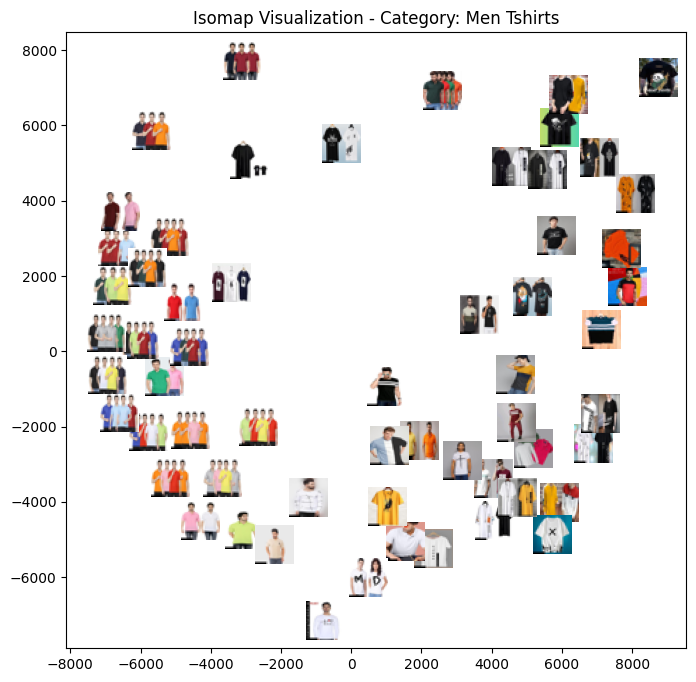

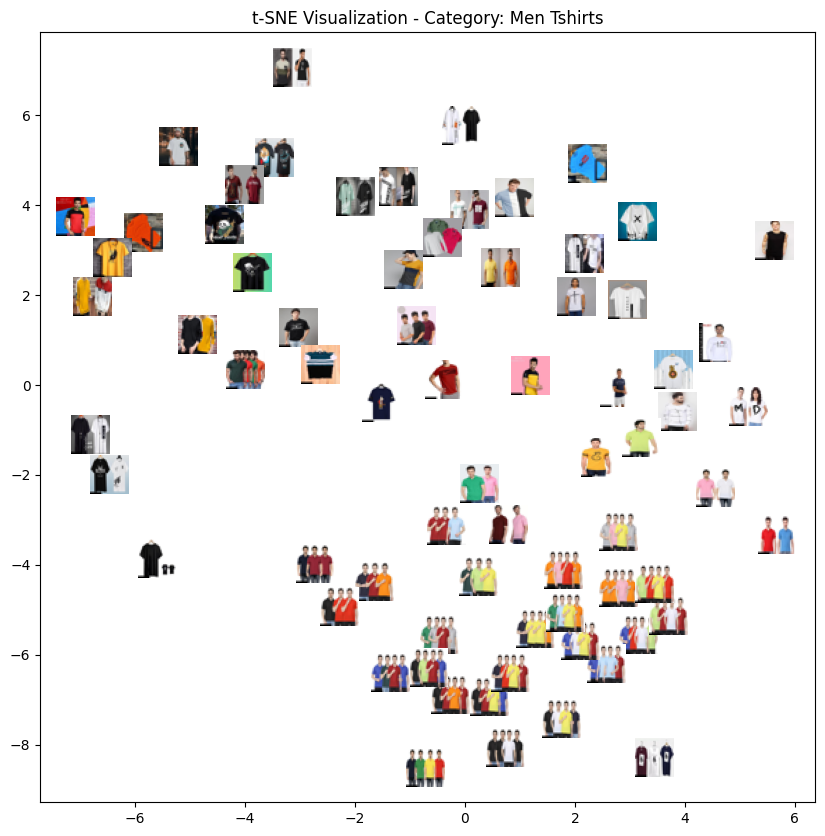

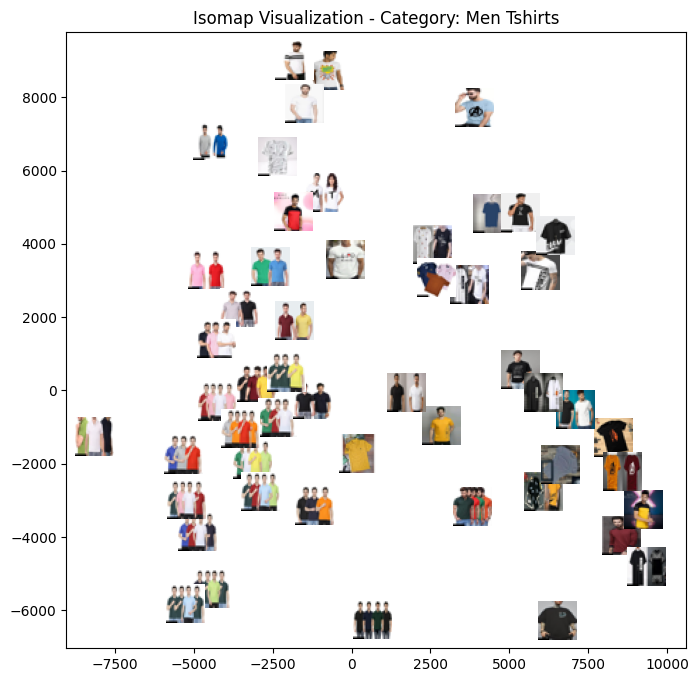

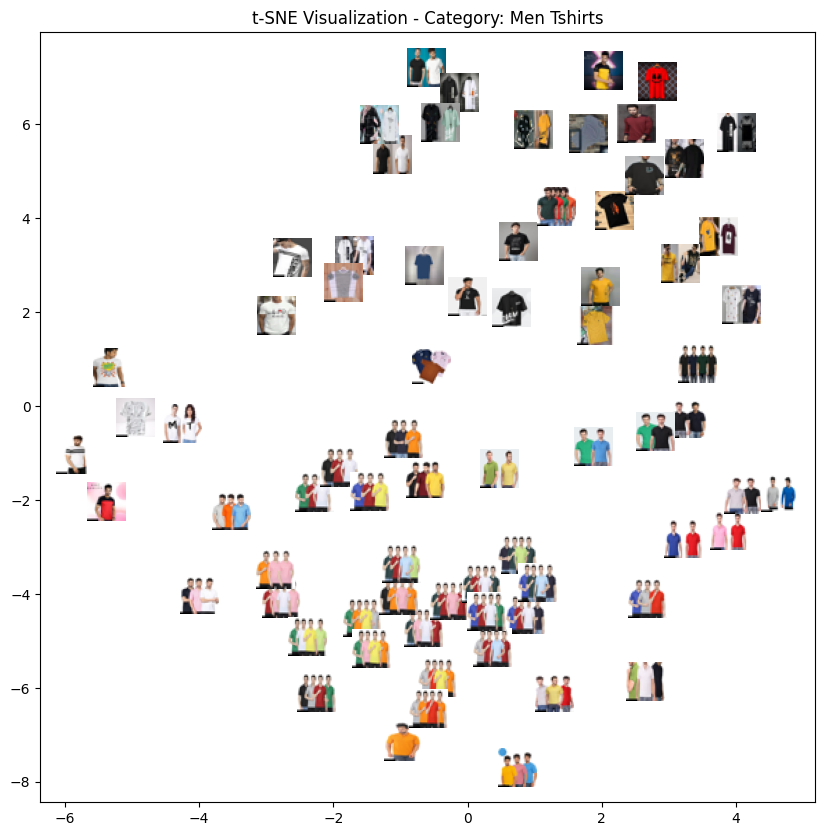

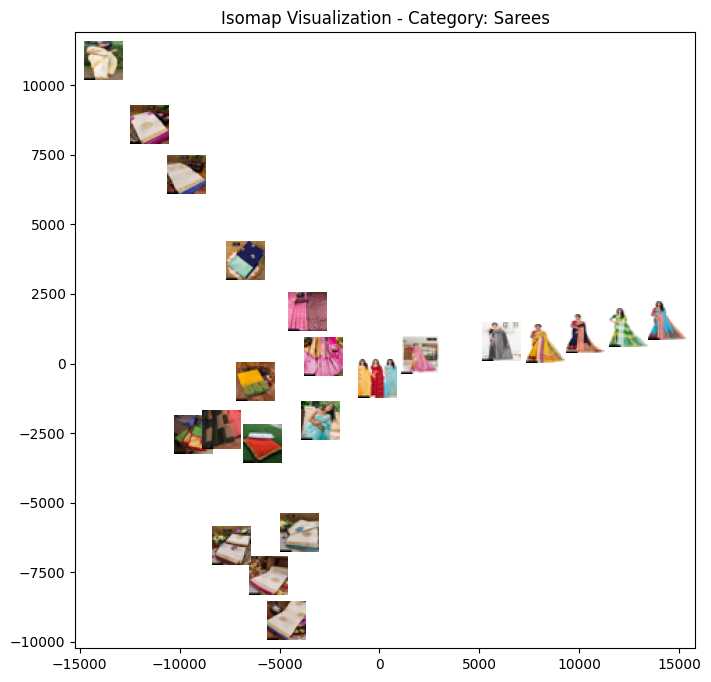

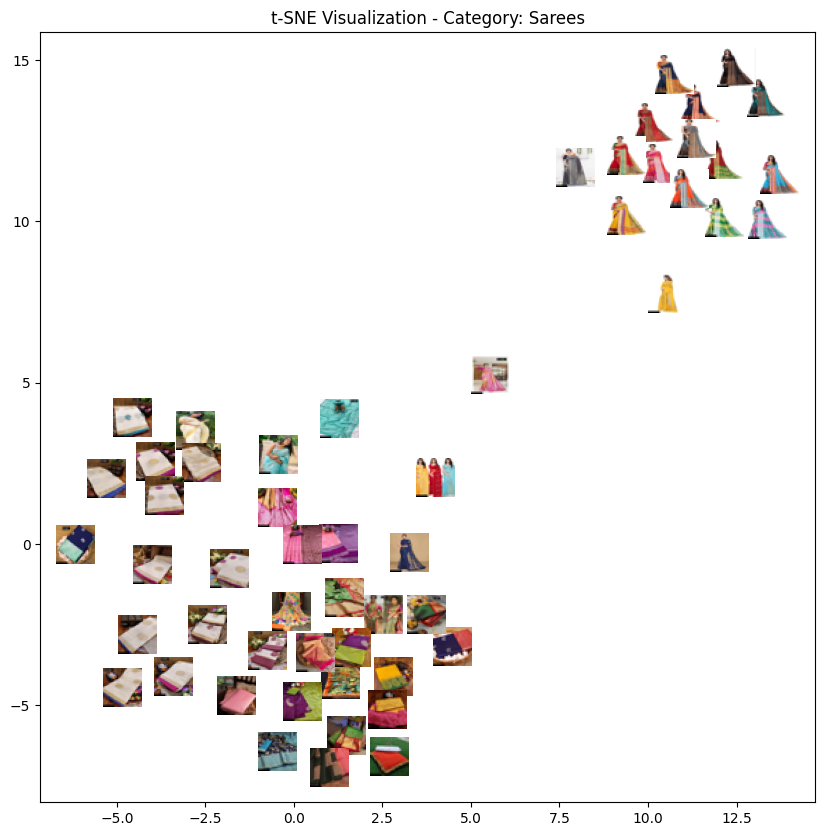

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/conda/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


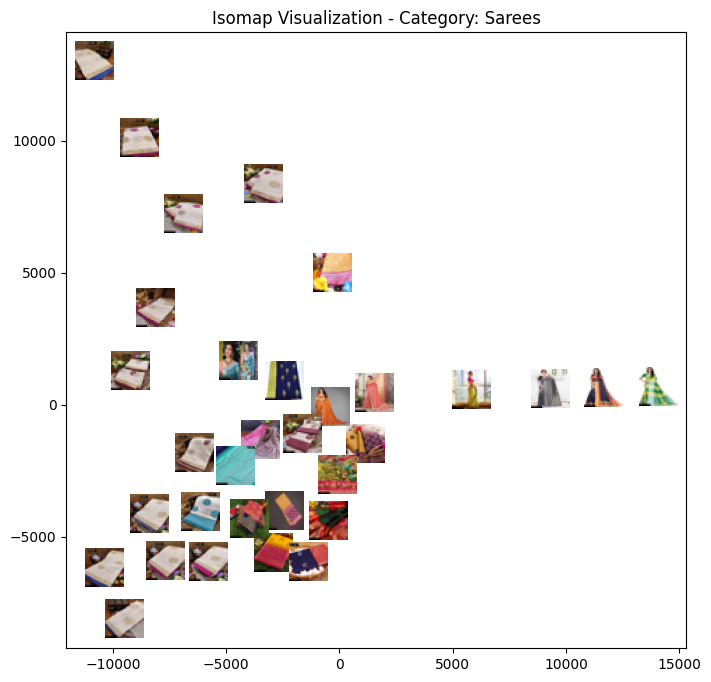

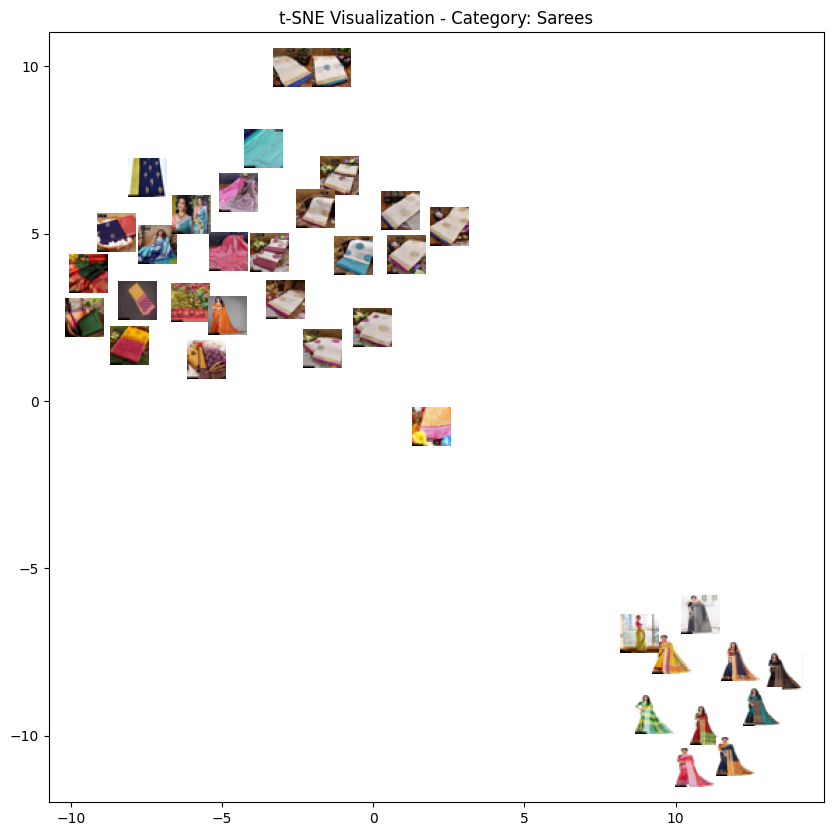

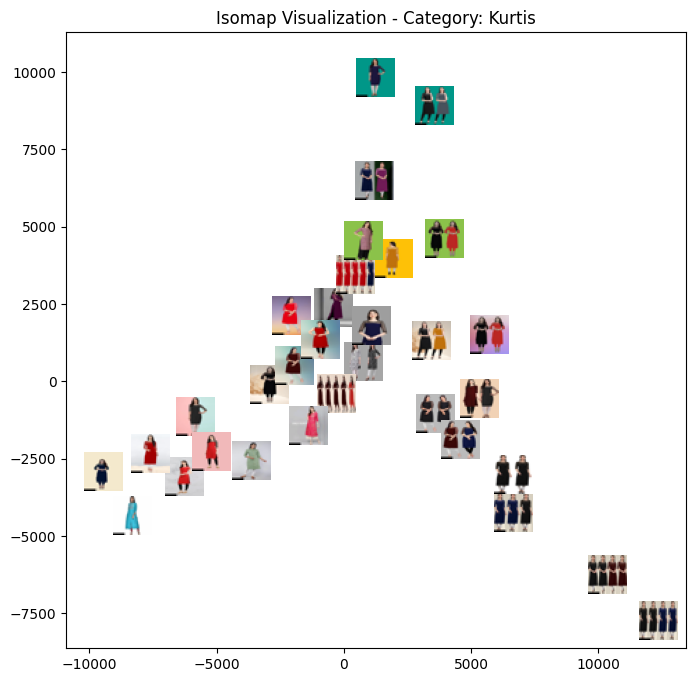

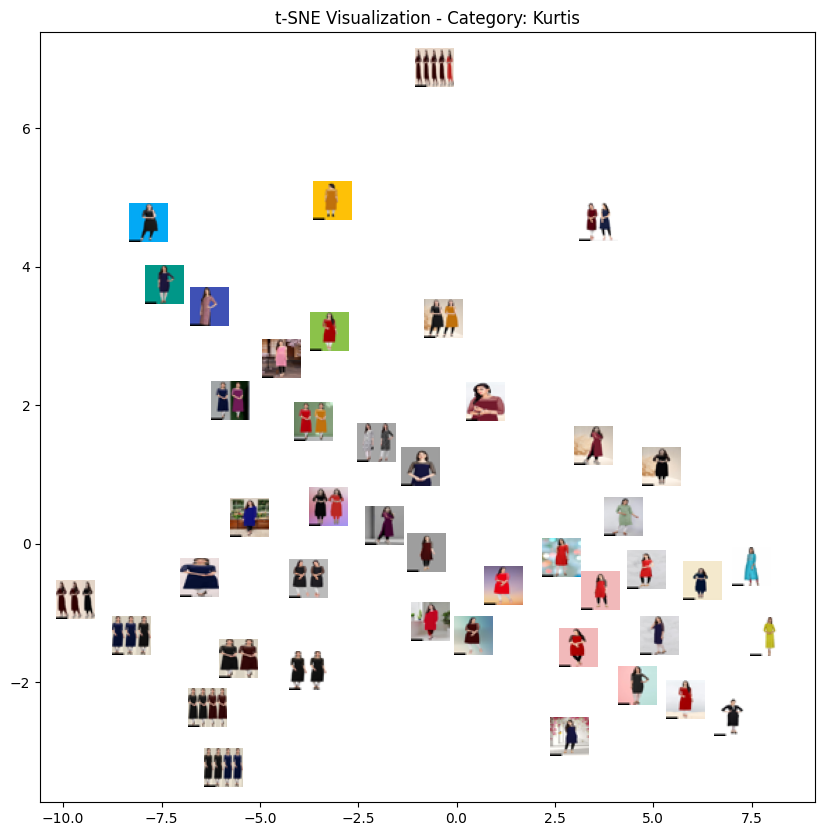

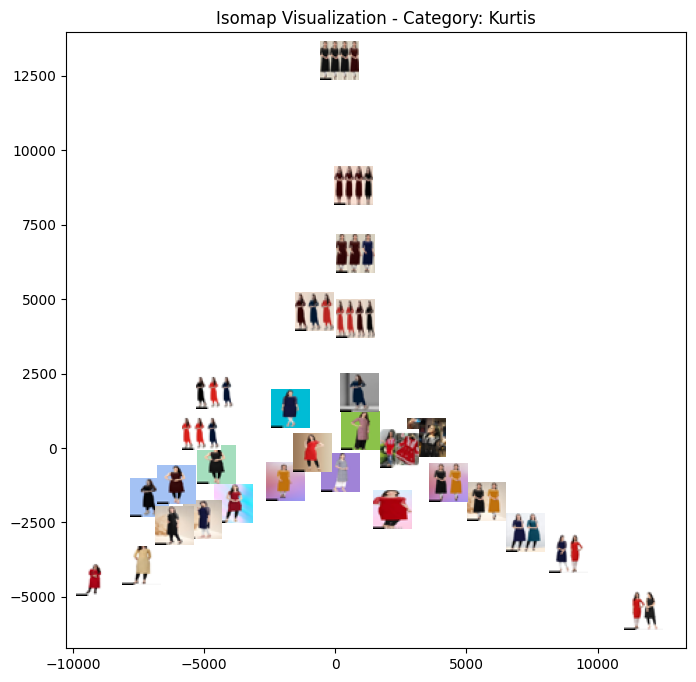

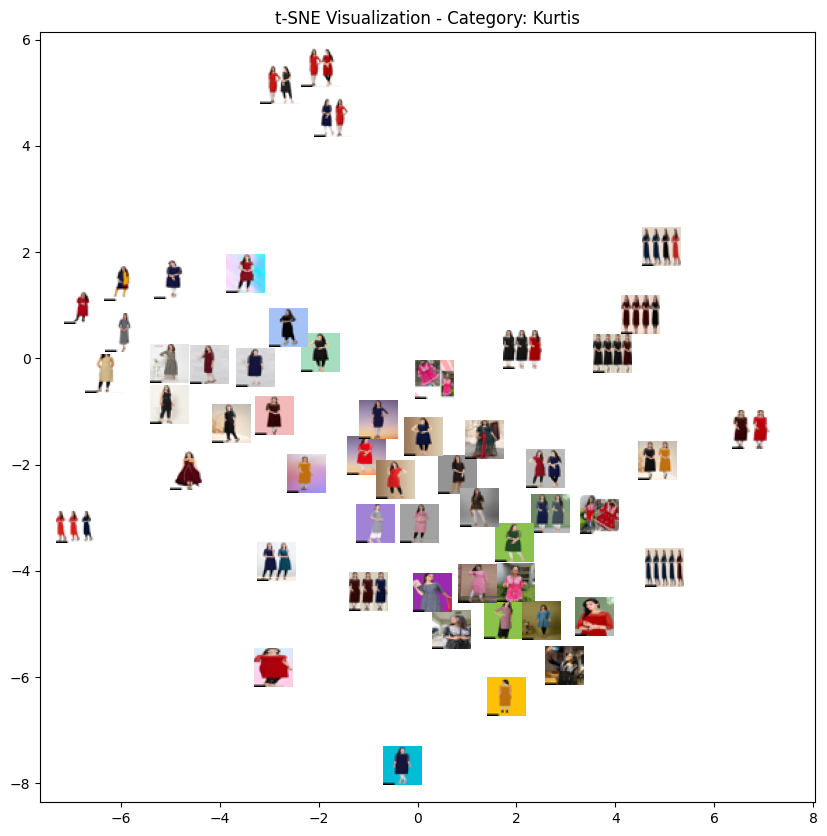

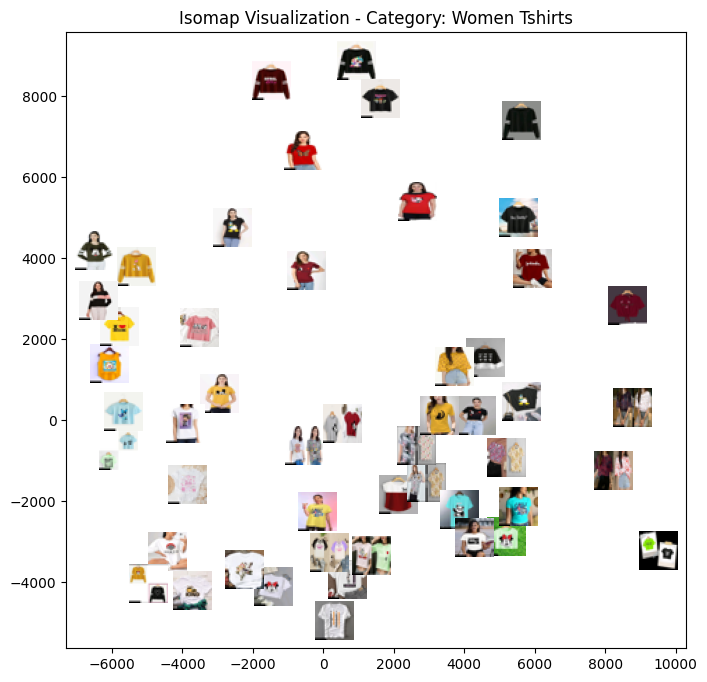

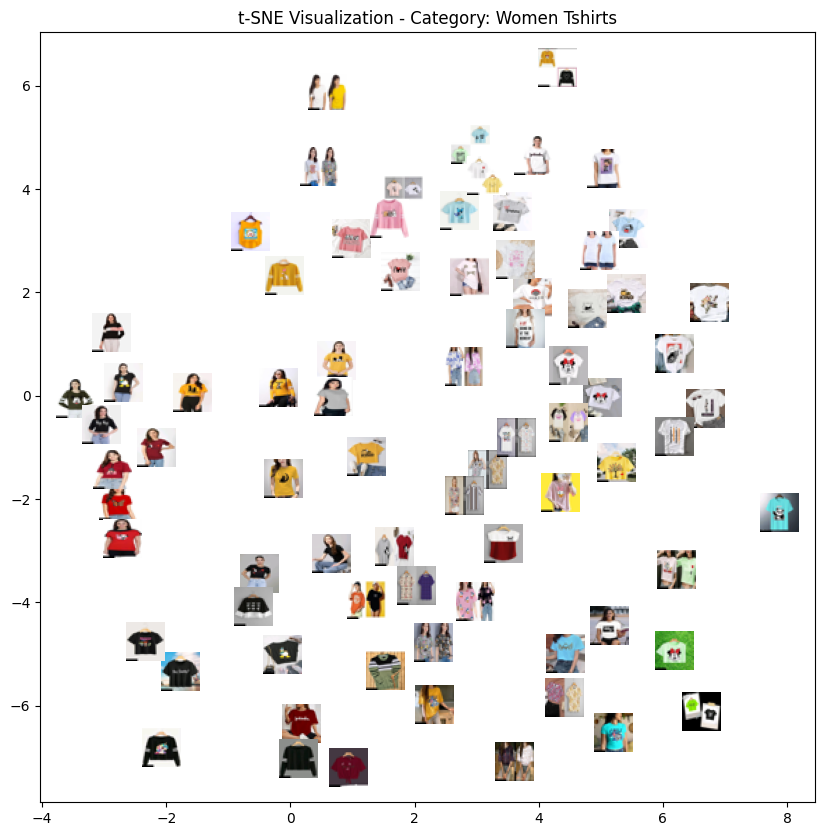

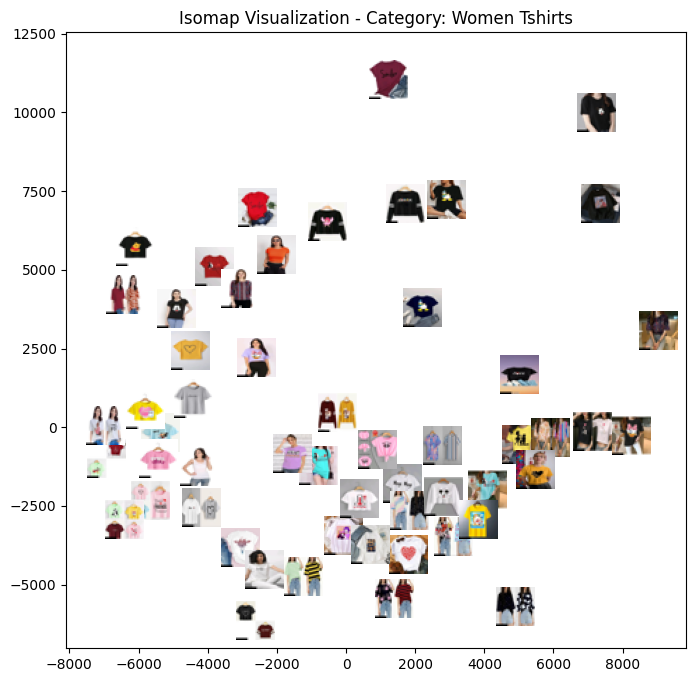

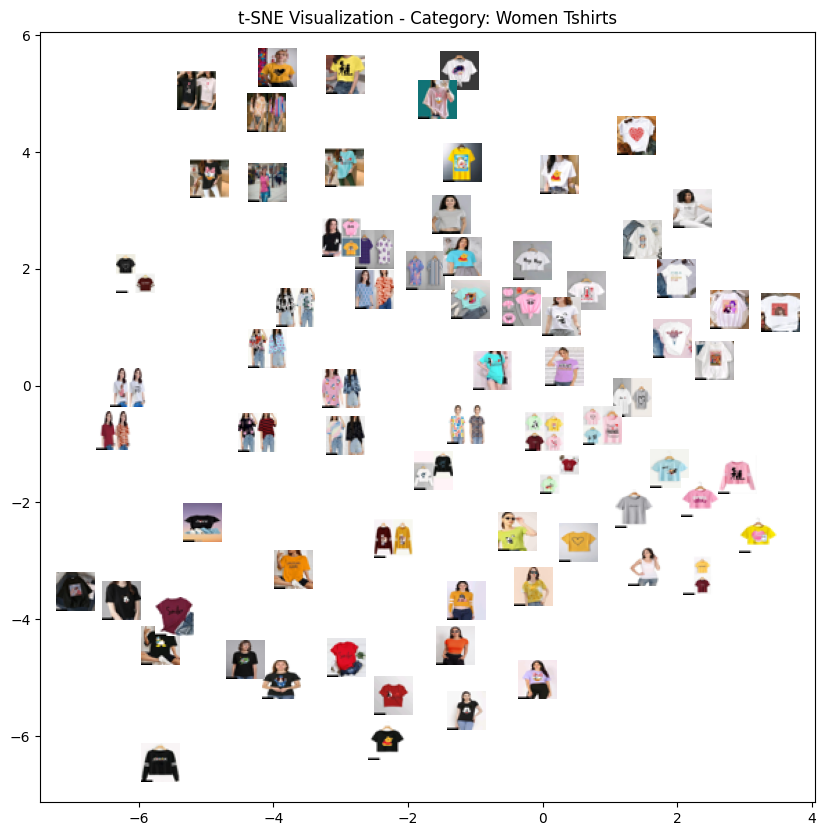

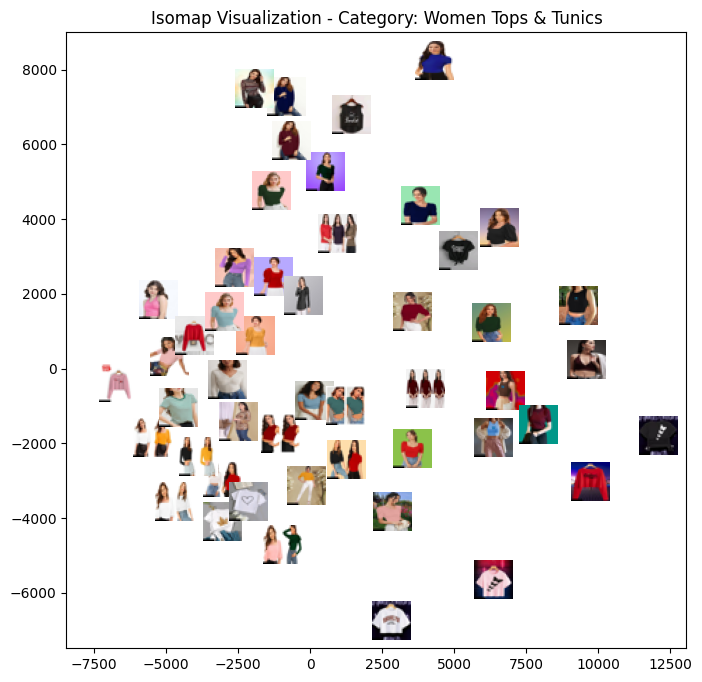

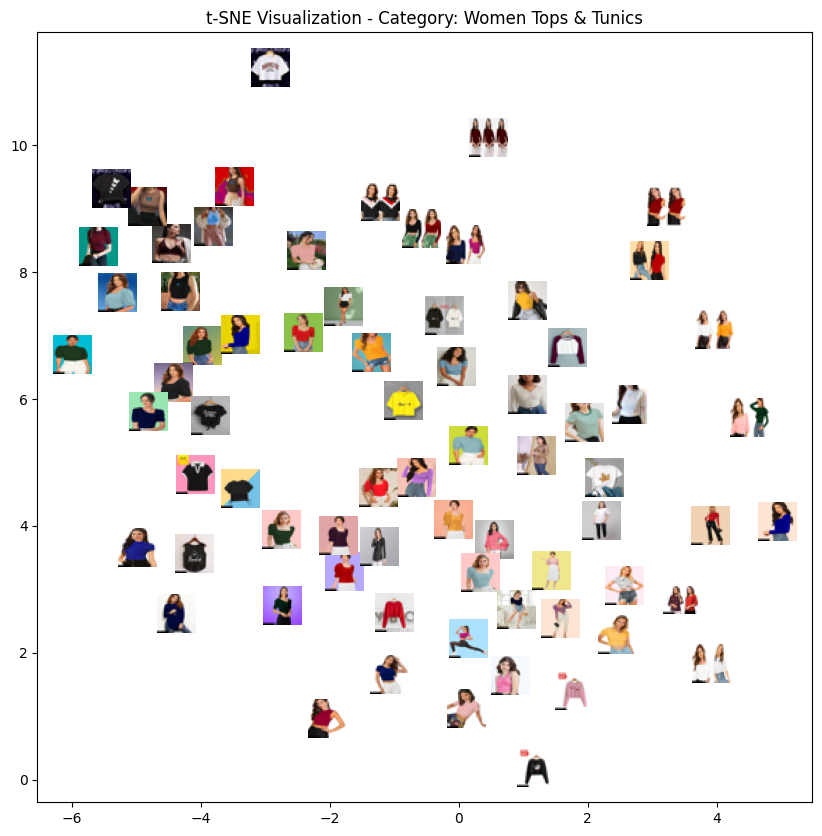

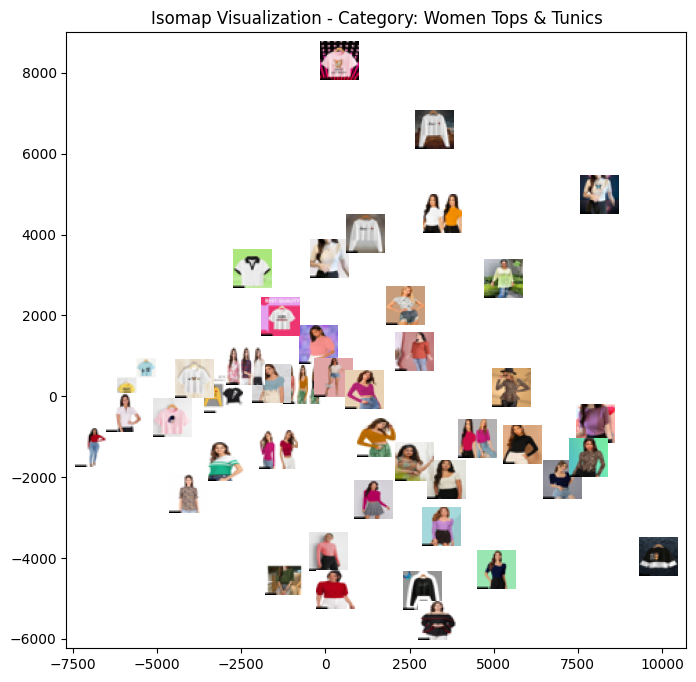

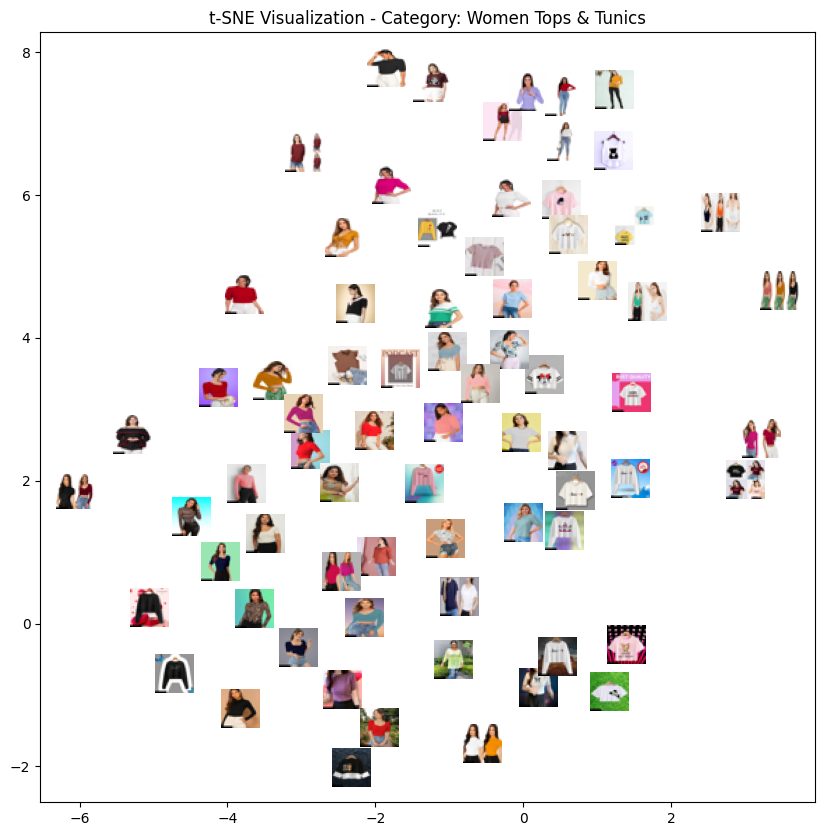

In [40]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np
import os

image_dir = '/kaggle/input/visual-taxonomy/train_images/'

def plot_components(data, model, images, ax=None, thumb_frac=0.05):
    proj = model.fit_transform(data)
    ax = ax or plt.gca()
    ax.plot(proj[:, 0], proj[:, 1], '.', alpha=0)
    min_dist = (proj.max(0) - proj.min(0)) * thumb_frac
    shown_images = np.array([2 * min_dist])
    for i in range(proj.shape[0]):
        dist = np.sum((proj[i] - shown_images) ** 2, axis=1)
        if np.min(dist) < min_dist[0] ** 2:
            continue
        shown_images = np.vstack([shown_images, proj[i]])
        imagebox = OffsetImage(images[i])
        ab = AnnotationBbox(imagebox, proj[i], frameon=False)
        ax.add_artist(ab)

num_samples_per_category = 100
num_categories = len(final_df) // num_samples_per_category

for i in range(num_categories):
    start_idx = i * num_samples_per_category
    end_idx = start_idx + num_samples_per_category
    sample_df = final_df.iloc[start_idx:end_idx]
    category_name = sample_df['Category'].iloc[0]
    images = []
    for image_id in sample_df['id']:
        padded_id = str(image_id).zfill(6)
        image_path = os.path.join(image_dir, f"{padded_id}.jpg")
        image = np.array(Image.open(image_path).resize((28, 28)))
        images.append(image)
    images = np.stack(images)
    flattened_images = images.reshape(len(images), -1)
    
    fig, ax = plt.subplots(figsize=(8,8))
    isomap = Isomap(n_neighbors=5, n_components=2)
    plot_components(flattened_images, isomap, images=images, ax=ax, thumb_frac=0.05)
    ax.set_title(f"Isomap Visualization - Category: {category_name}")
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 10))
    tsne = TSNE(n_components=2, random_state=0)
    plot_components(flattened_images, tsne, images=images, ax=ax, thumb_frac=0.05)
    ax.set_title(f"t-SNE Visualization - Category: {category_name}")
    plt.show()


# Task 3
Now comes the interesting part.  Recognize the patterns and figure out a name for the components 
your manifold learning methods have discovered.  You should also reason your choice of the name 
to the discovered manifold dimension.

In the Isomap and t-SNE visualizations for each category, images are plotted based on specific attributes that represent intrinsic differences in the appearance, style, and features of each product. The basis on which images are organized in the manifold space for each category:

### 1. **Men's T-Shirts**
   - **Basis**: The clustering in Isomap and t-SNE visualizations is primarily influenced by **fit type** (slim vs. regular fit), **color** (dark vs. light tones), and **pattern** (plain vs. graphic).
   - **Isomap**: Likely organizes images along a gradient where clusters reflect changes in fit and color tones, with distinct groupings for solid and patterned T-shirts.
   - **t-SNE**: Creates clusters based on color and pattern, showing clear separations between plain and graphic tees, as well as light and dark colors.

### 2. **Sarees**
   - **Basis**: Images are organized based on **occasion** (casual vs. festive), **ornamentation** (plain vs. embroidered), and **color vibrancy** (pastels vs. bold colors).
   - **Isomap**: Likely captures occasion and ornamentation, creating separations for casual vs. heavily decorated sarees.
   - **t-SNE**: Emphasizes color and design intricacies, clustering sarees by levels of ornamentation and color intensity.

### 3. **Kurtis**
   - **Basis**: The visualizations are organized according to **length** (short vs. long), **sleeve style** (sleeveless, short, or full sleeves), and **pattern** (solid vs. printed).
   - **Isomap**: Likely arranges images based on kurtis' lengths and sleeve types, showing clusters for shorter, sleeveless styles vs. longer, sleeved styles.
   - **t-SNE**: Separates the kurtis by pattern and color details, with distinct clusters for printed vs. solid kurtis.

### 4. **Women's T-Shirts**
   - **Basis**: Attributes such as **fit type** (loose vs. fitted), **neckline** (round vs. v-neck), and **color** are primary factors in how images are plotted.
   - **Isomap**: Organizes images by fit and neckline, grouping loose fits vs. more fitted designs, with further subdivision by neckline style.
   - **t-SNE**: Clusters images by color and pattern, creating separations between plain and patterned T-shirts, and variations in color tone.

### 5. **Women's Tops & Tunics**
   - **Basis**: Length (cropped vs. tunic-length), **sleeve style** (sleeveless vs. full sleeves), and **surface styling** (plain vs. embellished) are the main organizing attributes.
   - **Isomap**: Likely captures length and embellishment, grouping plain, shorter tops separately from longer, embellished tunics.
   - **t-SNE**: Clusters images by sleeve style and surface detail, showing clear distinctions between sleeveless styles and more elaborate, styled options.
